In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping



#### The research paper points out that past models may not have been effective because they missed the granularity of high-frequency price movements. Using hourly data provides a balance between high-frequency and low-frequency data, potentially allowing you to:

- Capture more detailed price movement patterns that were previously missed by using low-frequency data.
- Still maintain a level of interpretability that is sometimes lost when analyzing very high-frequency data.
- Long-Term Market Trends: The data could be used to capture broader market trends, which are useful for swing traders or position traders. These traders might aim to capitalize on longer-term movements in Forex prices, such as the general uptrend or downtrend of a currency pair over weeks or months.
- Collected a moderately frequency data. i.e. by the hour.
Common Use Cases for Moderate-Frequency Data:
Medium-term trends (e.g., price direction over hours or days)

In [3]:
df_train=pd.read_csv('/kaggle/input/mubaraq-datasetsss-5/EURUSD_H1_training.xls')

In [4]:
df_train['TREND'] = (df_train['CLOSE'].shift(-1) > df_train['CLOSE']).astype(int)

This creates a new column where 1 indicates "Up" and 0 indicates "Down"

In [5]:
df_train

,Unnamed: 0,DATE,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,TREND
0,0,2013.01.01,23:00:00,1.32036,1.32192,1.31977,1.32053,1377,0,4,0
1,1,2013.01.02,00:00:00,1.32049,1.32073,1.31866,1.31974,3895,0,4,1
2,2,2013.01.02,01:00:00,1.31972,1.32124,1.31916,1.32065,3601,0,4,1
3,3,2013.01.02,02:00:00,1.32067,1.32767,1.32065,1.32734,7670,0,4,1
4,4,2013.01.02,03:00:00,1.32734,1.32992,1.32706,1.32934,7019,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
18500,18500,2015.12.31,16:00:00,1.08872,1.08890,1.08750,1.08827,6199,7204459000,7,0
18501,18501,2015.12.31,17:00:00,1.08825,1.09007,1.08597,1.08665,8792,9540295000,7,0
18502,18502,2015.12.31,18:00:00,1.08666,1.08689,1.08530,1.08580,7412,8885375000,7,1
18503,18503,2015.12.31,19:00:00,1.08565,1.08653,1.08526,1.08652,3442,5781667000,0,0


If your model predicts a 1, it indicates that the model is predicting an uptrend in the market, meaning the price is expected to rise in the next time period. This corresponds to the situation where there are more buyers than sellers, and the price is moving upward.
In simpler terms, a prediction of 1 suggests the market is likely to increase in value.

If your model gives a 0, it indicates that the model is predicting a downtrend in the market, meaning the price is expected to fall in the next time period. This corresponds to a scenario where there are more sellers than buyers, leading to a decrease in price.
In simpler terms, a prediction of 0 suggests that the market is likely to decrease in value.

In [6]:
df_test=pd.read_csv('/kaggle/input/mubaraq-datasetsss-5/EURUSD_H1_testing.xls')
# Assuming `df` is your DataFrame
df_test['TREND'] = (df_test['CLOSE'].shift(-1) > df_test['CLOSE']).astype(int)
# This creates a new column where 1 indicates "Up" and 0 indicates "Down"

In [7]:
df_test

,Unnamed: 0,DATE,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,TREND
0,18505,2016.01.04,00:00:00,1.08696,1.08723,1.08656,1.08665,904,629242000,0,0
1,18506,2016.01.04,01:00:00,1.08664,1.08665,1.08449,1.08514,3093,3080554000,7,0
2,18507,2016.01.04,02:00:00,1.08514,1.08575,1.08428,1.08451,3128,3278745000,7,1
3,18508,2016.01.04,03:00:00,1.08450,1.08614,1.08270,1.08594,5611,5887393000,7,1
4,18509,2016.01.04,04:00:00,1.08595,1.08755,1.08580,1.08713,5702,6175403000,7,0
...,...,...,...,...,...,...,...,...,...,...,...
4647,23152,2016.09.29,20:00:00,1.12227,1.12254,1.12042,1.12052,9364,11688230000,7,1
4648,23153,2016.09.29,21:00:00,1.12052,1.12186,1.12037,1.12151,6836,7934645000,7,1
4649,23154,2016.09.29,22:00:00,1.12154,1.12184,1.12126,1.12179,4119,4949037000,7,1
4650,23155,2016.09.29,23:00:00,1.12179,1.12244,1.12172,1.12210,2386,2402767000,7,0


### Excerpts from the paper:
''There are some ANN and decision tree models which have been 
used with forecast the uptrend or downtrend in stock market [11-
14]. Although these works reported about their abilities to work 
with real time data, however, their experiments have reported of 
lacking of using high frequency data [15]. ''

- Why did i then still decide to use ANN still after it has been used before . The [referenced paper (14)](https://www.researchgate.net/publication/220385306_Forecasting_Foreign_Exchange_Rates_With_Artificial_Neural_Networks_A_Review),published in 2004 ,which was referenced in the research paper we are both studying used DEM/USD exchange rate as against what we are using which is EUR/USD.

- Hence for my reason of still implementing the multi-layer perceptron network.

After studying the paper I would be employing: 
- ANN and ARIMA to carry out prediction

- We can then come up with a table to compared the prediction metrics of all our models and also compare it holistically with what is in the paper (SVM)
They used only precision. We can employ accuracy and recall in the process

In [9]:
# To leverage DATE and TIME effectively for prediction, you can transform them into more useful features we need to combine into a Datetime Object
df_train['datetime'] = pd.to_datetime(df_train['DATE'] + ' ' + df_train['TIME']) 
df_test['datetime'] = pd.to_datetime(df_test['DATE'] + ' ' + df_test['TIME']) 

In [10]:
# Manipulating the Timestamp object 'datetime' for better interpretability by the ML library which would expect numerical input

In [11]:
df_train['Year'] = pd.to_datetime(df_train['datetime'], unit='s').dt.year
df_train['Month'] = pd.to_datetime(df_train['datetime'], unit='s').dt.month
df_train['Day'] = pd.to_datetime(df_train['datetime'], unit='s').dt.day
df_train['Hour'] = pd.to_datetime(df_train['datetime'], unit='s').dt.hour

In [12]:
df_test['Year'] = pd.to_datetime(df_test['datetime'], unit='s').dt.year
df_test['Month'] = pd.to_datetime(df_test['datetime'], unit='s').dt.month
df_test['Day'] = pd.to_datetime(df_test['datetime'], unit='s').dt.day
df_test['Hour'] = pd.to_datetime(df_test['datetime'], unit='s').dt.hour

In [13]:
df_test

,Unnamed: 0,DATE,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,TREND,datetime,Year,Month,Day,Hour
0,18505,2016.01.04,00:00:00,1.08696,1.08723,1.08656,1.08665,904,629242000,0,0,2016-01-04 00:00:00,2016,1,4,0
1,18506,2016.01.04,01:00:00,1.08664,1.08665,1.08449,1.08514,3093,3080554000,7,0,2016-01-04 01:00:00,2016,1,4,1
2,18507,2016.01.04,02:00:00,1.08514,1.08575,1.08428,1.08451,3128,3278745000,7,1,2016-01-04 02:00:00,2016,1,4,2
3,18508,2016.01.04,03:00:00,1.08450,1.08614,1.08270,1.08594,5611,5887393000,7,1,2016-01-04 03:00:00,2016,1,4,3
4,18509,2016.01.04,04:00:00,1.08595,1.08755,1.08580,1.08713,5702,6175403000,7,0,2016-01-04 04:00:00,2016,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,23152,2016.09.29,20:00:00,1.12227,1.12254,1.12042,1.12052,9364,11688230000,7,1,2016-09-29 20:00:00,2016,9,29,20
4648,23153,2016.09.29,21:00:00,1.12052,1.12186,1.12037,1.12151,6836,7934645000,7,1,2016-09-29 21:00:00,2016,9,29,21
4649,23154,2016.09.29,22:00:00,1.12154,1.12184,1.12126,1.12179,4119,4949037000,7,1,2016-09-29 22:00:00,2016,9,29,22
4650,23155,2016.09.29,23:00:00,1.12179,1.12244,1.12172,1.12210,2386,2402767000,7,0,2016-09-29 23:00:00,2016,9,29,23


In [14]:
# dropping 'Unnamed', 'DATE', 'TIME' column
df_train=df_train.drop(columns=['Unnamed: 0'])
df_test=df_test.drop(columns=['Unnamed: 0'])

In [15]:
# Feature Engineering - Calculate RSI, Moving Average, Bollinger Bands, and ATR for H1 data
def calculate_rsi(df, period=14):
    delta = df['CLOSE'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def calculate_moving_average(df, period=9):
    return df['CLOSE'].rolling(window=period).mean()

def calculate_bollinger_bands(df, period=20):
    sma = df['CLOSE'].rolling(window=period).mean()
    std = df['CLOSE'].rolling(window=period).std()
    upper_band = sma + (std * 2)
    lower_band = sma - (std * 2)
    return upper_band, sma, lower_band

def calculate_atr(df, period=14):
    high_low = df['HIGH'] - df['LOW']
    high_close = np.abs(df['HIGH'] - df['CLOSE'].shift())
    low_close = np.abs(df['LOW'] - df['CLOSE'].shift())
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    return true_range.rolling(window=period).mean()

In [16]:
# Apply calculations
df_train['RSI'] = calculate_rsi(df_train, period=14)
df_train['MA9'] = calculate_moving_average(df_train, period=9)
df_train['MA21'] = calculate_moving_average(df_train, period=21)
df_train['BB_upper'], df_train['BB_middle'], df_train['BB_lower'] = calculate_bollinger_bands(df_train, period=20)
df_train['ATR'] = calculate_atr(df_train, period=14)

In [17]:
# Apply calculations
df_test['RSI'] = calculate_rsi(df_test, period=14)
df_test['MA9'] = calculate_moving_average(df_test, period=9)
df_test['MA21'] = calculate_moving_average(df_test, period=21)
df_test['BB_upper'], df_test['BB_middle'], df_test['BB_lower'] = calculate_bollinger_bands(df_test, period=20)
df_test['ATR'] = calculate_atr(df_test, period=14)

In [18]:
df_train

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,TREND,...,Month,Day,Hour,RSI,MA9,MA21,BB_upper,BB_middle,BB_lower,ATR
0,2013.01.01,23:00:00,1.32036,1.32192,1.31977,1.32053,1377,0,4,0,...,1,1,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013.01.02,00:00:00,1.32049,1.32073,1.31866,1.31974,3895,0,4,1,...,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013.01.02,01:00:00,1.31972,1.32124,1.31916,1.32065,3601,0,4,1,...,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013.01.02,02:00:00,1.32067,1.32767,1.32065,1.32734,7670,0,4,1,...,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013.01.02,03:00:00,1.32734,1.32992,1.32706,1.32934,7019,0,4,0,...,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18500,2015.12.31,16:00:00,1.08872,1.08890,1.08750,1.08827,6199,7204459000,7,0,...,12,31,16,21.633086,1.090636,1.091852,1.095446,1.091881,1.088316,0.001369
18501,2015.12.31,17:00:00,1.08825,1.09007,1.08597,1.08665,8792,9540295000,7,0,...,12,31,17,20.858896,1.089912,1.091632,1.095843,1.091593,1.087343,0.001556
18502,2015.12.31,18:00:00,1.08666,1.08689,1.08530,1.08580,7412,8885375000,7,1,...,12,31,18,19.114878,1.089150,1.091317,1.096143,1.091230,1.086318,0.001619
18503,2015.12.31,19:00:00,1.08565,1.08653,1.08526,1.08652,3442,5781667000,0,0,...,12,31,19,19.114878,1.088517,1.091006,1.096153,1.090901,1.085648,0.001644


In [19]:
columns=list(df_train.columns)

In [20]:
columns

['DATE',
 'TIME',
 'OPEN',
 'HIGH',
 'LOW',
 'CLOSE',
 'TICKVOL',
 'VOL',
 'SPREAD',
 'TREND',
 'datetime',
 'Year',
 'Month',
 'Day',
 'Hour',
 'RSI',
 'MA9',
 'MA21',
 'BB_upper',
 'BB_middle',
 'BB_lower',
 'ATR']

In [21]:
# Drop any rows with NaN values from rolling calculations
df_train.dropna(inplace=True)

In [22]:
df_train

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,TREND,...,Month,Day,Hour,RSI,MA9,MA21,BB_upper,BB_middle,BB_lower,ATR
20,2013.01.02,19:00:00,1.31689,1.31741,1.31570,1.31637,1586,0,8,1,...,1,2,19,25.000000,1.322521,1.324305,1.332161,1.324493,1.316826,0.002691
21,2013.01.02,20:00:00,1.31639,1.31752,1.31567,1.31748,1354,0,9,1,...,1,2,20,26.932794,1.321743,1.324160,1.332401,1.324380,1.316360,0.002701
22,2013.01.02,21:00:00,1.31749,1.31847,1.31749,1.31846,1197,0,8,1,...,1,2,21,28.663049,1.321040,1.324099,1.332561,1.324271,1.315981,0.002695
23,2013.01.02,22:00:00,1.31848,1.31897,1.31817,1.31859,1091,0,9,1,...,1,2,22,28.344896,1.320140,1.324000,1.332362,1.323833,1.315305,0.002579
24,2013.01.02,23:00:00,1.31860,1.31900,1.31776,1.31888,972,0,12,0,...,1,2,23,26.636225,1.319480,1.323598,1.331699,1.323311,1.314922,0.002501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18500,2015.12.31,16:00:00,1.08872,1.08890,1.08750,1.08827,6199,7204459000,7,0,...,12,31,16,21.633086,1.090636,1.091852,1.095446,1.091881,1.088316,0.001369
18501,2015.12.31,17:00:00,1.08825,1.09007,1.08597,1.08665,8792,9540295000,7,0,...,12,31,17,20.858896,1.089912,1.091632,1.095843,1.091593,1.087343,0.001556
18502,2015.12.31,18:00:00,1.08666,1.08689,1.08530,1.08580,7412,8885375000,7,1,...,12,31,18,19.114878,1.089150,1.091317,1.096143,1.091230,1.086318,0.001619
18503,2015.12.31,19:00:00,1.08565,1.08653,1.08526,1.08652,3442,5781667000,0,0,...,12,31,19,19.114878,1.088517,1.091006,1.096153,1.090901,1.085648,0.001644


In [23]:
# Assuming df_test is your DataFrame
#df_train = df_train.set_index('datetime') 

In [24]:
df_train

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,TREND,...,Month,Day,Hour,RSI,MA9,MA21,BB_upper,BB_middle,BB_lower,ATR
20,2013.01.02,19:00:00,1.31689,1.31741,1.31570,1.31637,1586,0,8,1,...,1,2,19,25.000000,1.322521,1.324305,1.332161,1.324493,1.316826,0.002691
21,2013.01.02,20:00:00,1.31639,1.31752,1.31567,1.31748,1354,0,9,1,...,1,2,20,26.932794,1.321743,1.324160,1.332401,1.324380,1.316360,0.002701
22,2013.01.02,21:00:00,1.31749,1.31847,1.31749,1.31846,1197,0,8,1,...,1,2,21,28.663049,1.321040,1.324099,1.332561,1.324271,1.315981,0.002695
23,2013.01.02,22:00:00,1.31848,1.31897,1.31817,1.31859,1091,0,9,1,...,1,2,22,28.344896,1.320140,1.324000,1.332362,1.323833,1.315305,0.002579
24,2013.01.02,23:00:00,1.31860,1.31900,1.31776,1.31888,972,0,12,0,...,1,2,23,26.636225,1.319480,1.323598,1.331699,1.323311,1.314922,0.002501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18500,2015.12.31,16:00:00,1.08872,1.08890,1.08750,1.08827,6199,7204459000,7,0,...,12,31,16,21.633086,1.090636,1.091852,1.095446,1.091881,1.088316,0.001369
18501,2015.12.31,17:00:00,1.08825,1.09007,1.08597,1.08665,8792,9540295000,7,0,...,12,31,17,20.858896,1.089912,1.091632,1.095843,1.091593,1.087343,0.001556
18502,2015.12.31,18:00:00,1.08666,1.08689,1.08530,1.08580,7412,8885375000,7,1,...,12,31,18,19.114878,1.089150,1.091317,1.096143,1.091230,1.086318,0.001619
18503,2015.12.31,19:00:00,1.08565,1.08653,1.08526,1.08652,3442,5781667000,0,0,...,12,31,19,19.114878,1.088517,1.091006,1.096153,1.090901,1.085648,0.001644


In [25]:
# Define features and target
features = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'RSI', 'MA9', 'MA21', 'BB_upper', 'BB_middle', 'BB_lower', 'ATR']
x_train = df_train[features]
y_train = df_train['TREND']

In [26]:
new_df_train=df_train[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'RSI', 'MA9', 'MA21', 'BB_upper', 'BB_middle', 'BB_lower', 'ATR','TREND']]
new_df_train 
# trying to view the dataset (training)

,OPEN,HIGH,LOW,CLOSE,RSI,MA9,MA21,BB_upper,BB_middle,BB_lower,ATR,TREND
20,1.31689,1.31741,1.31570,1.31637,25.000000,1.322521,1.324305,1.332161,1.324493,1.316826,0.002691,1
21,1.31639,1.31752,1.31567,1.31748,26.932794,1.321743,1.324160,1.332401,1.324380,1.316360,0.002701,1
22,1.31749,1.31847,1.31749,1.31846,28.663049,1.321040,1.324099,1.332561,1.324271,1.315981,0.002695,1
23,1.31848,1.31897,1.31817,1.31859,28.344896,1.320140,1.324000,1.332362,1.323833,1.315305,0.002579,1
24,1.31860,1.31900,1.31776,1.31888,26.636225,1.319480,1.323598,1.331699,1.323311,1.314922,0.002501,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18500,1.08872,1.08890,1.08750,1.08827,21.633086,1.090636,1.091852,1.095446,1.091881,1.088316,0.001369,0
18501,1.08825,1.09007,1.08597,1.08665,20.858896,1.089912,1.091632,1.095843,1.091593,1.087343,0.001556,0
18502,1.08666,1.08689,1.08530,1.08580,19.114878,1.089150,1.091317,1.096143,1.091230,1.086318,0.001619,1
18503,1.08565,1.08653,1.08526,1.08652,19.114878,1.088517,1.091006,1.096153,1.090901,1.085648,0.001644,0


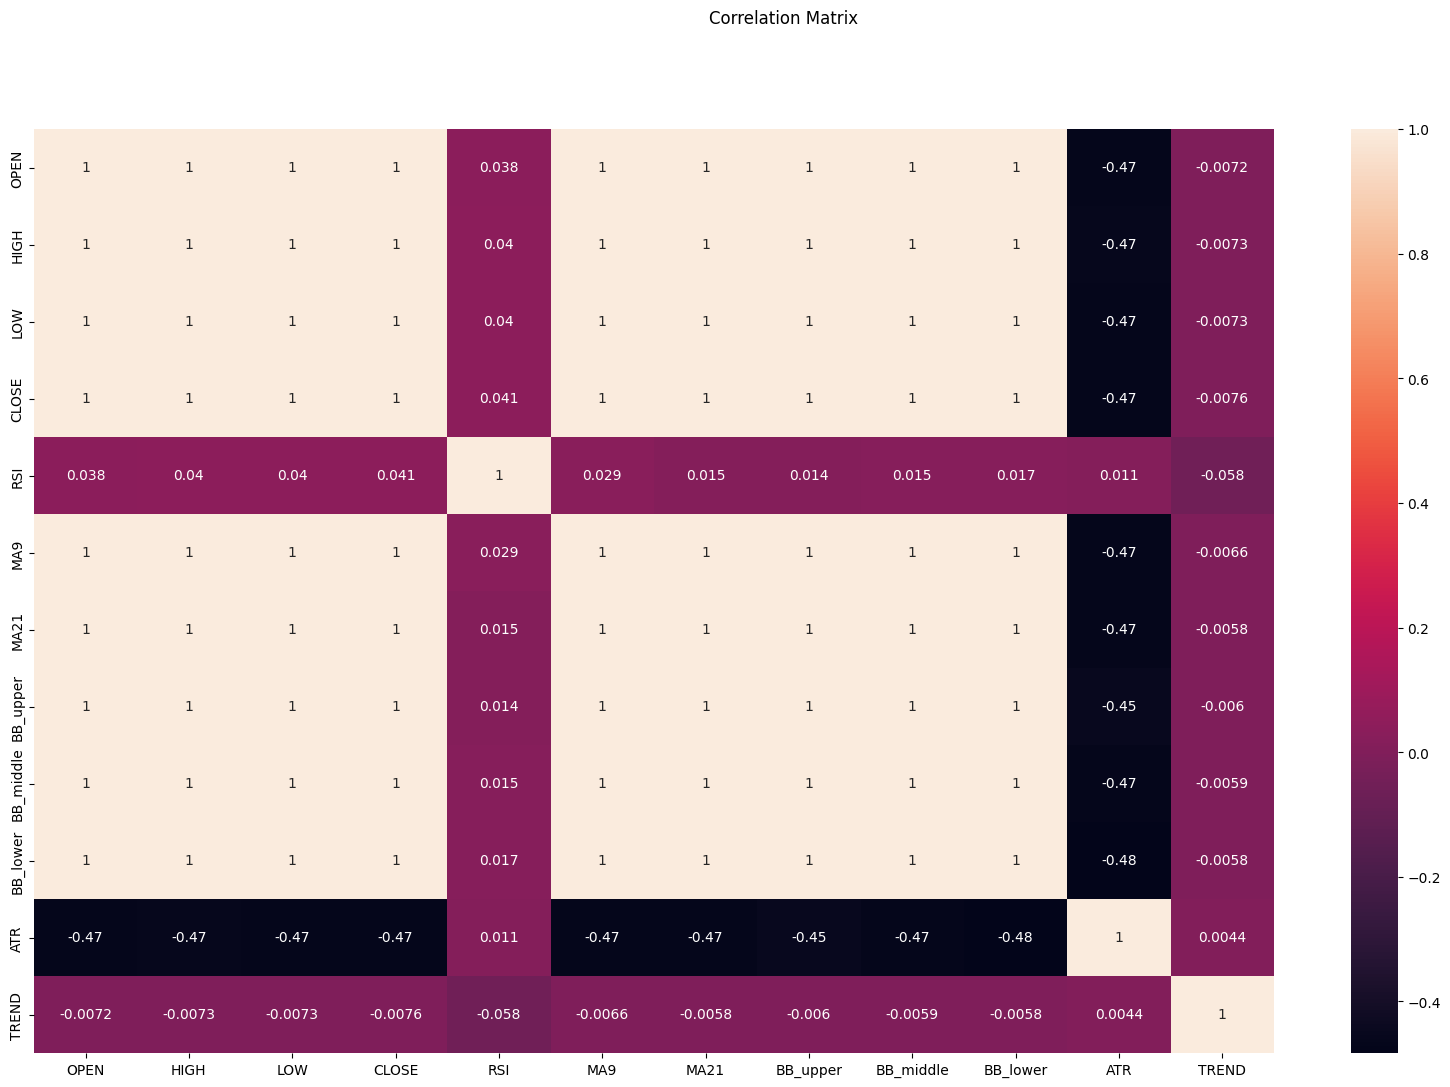

In [27]:
plt.figure(figsize=(20,12))
correlation_matrix=new_df_train.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

In [28]:
x_test = df_test[features]
y_test = df_test['TREND']

In [29]:
x_train

,OPEN,HIGH,LOW,CLOSE,RSI,MA9,MA21,BB_upper,BB_middle,BB_lower,ATR
20,1.31689,1.31741,1.31570,1.31637,25.000000,1.322521,1.324305,1.332161,1.324493,1.316826,0.002691
21,1.31639,1.31752,1.31567,1.31748,26.932794,1.321743,1.324160,1.332401,1.324380,1.316360,0.002701
22,1.31749,1.31847,1.31749,1.31846,28.663049,1.321040,1.324099,1.332561,1.324271,1.315981,0.002695
23,1.31848,1.31897,1.31817,1.31859,28.344896,1.320140,1.324000,1.332362,1.323833,1.315305,0.002579
24,1.31860,1.31900,1.31776,1.31888,26.636225,1.319480,1.323598,1.331699,1.323311,1.314922,0.002501
...,...,...,...,...,...,...,...,...,...,...,...
18500,1.08872,1.08890,1.08750,1.08827,21.633086,1.090636,1.091852,1.095446,1.091881,1.088316,0.001369
18501,1.08825,1.09007,1.08597,1.08665,20.858896,1.089912,1.091632,1.095843,1.091593,1.087343,0.001556
18502,1.08666,1.08689,1.08530,1.08580,19.114878,1.089150,1.091317,1.096143,1.091230,1.086318,0.001619
18503,1.08565,1.08653,1.08526,1.08652,19.114878,1.088517,1.091006,1.096153,1.090901,1.085648,0.001644


### Commencing prediction using an Artificial Neural Network

In [30]:
# for building and training neural networks
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1

# for preparing data and deriving its metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.activations import get


# for balancing class
from sklearn.utils.class_weight import compute_class_weight

In [31]:
x_test.shape

(4652, 11)

In [32]:
x_test = np.array([x_test])
x_train = np.array([x_train])
y_test = np.array([y_test])
y_train = np.array([y_train])
x_test=x_test.reshape(4652, 11)
y_test=y_test.reshape(4652,)
x_train=x_train.reshape(18485, 11)
y_train=y_train.reshape(18485,)

In [33]:
# Assuming you have your labels in a variable called y_train
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
'''The 'balanced' mode tells the function to compute class weights inversely proportional to the class frequencies. In other words, classes that 
appear less frequently will get a higher weight to ensure the model gives them more importance during training.'''

# normally from my speculation, I personally think that the classes has to be in numpy array format, because the y train and possibly the x train format are in numpy format



"The 'balanced' mode tells the function to compute class weights inversely proportional to the class frequencies. In other words, classes that \nappear less frequently will get a higher weight to ensure the model gives them more importance during training."

In [34]:
class_weights

array([0.99232338, 1.00779631])

In [35]:
# Convert class weights to a dictionary
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
# so basically, what we are trying to do here is to extract the class weights for each classes off of the y data so that we can use these class weights to train the variables 


In [36]:
class_weight_dict

{0: 0.9923233841528881, 1: 1.0077963144695234}

In [37]:
# for a multi class task. Although we are not doing any of such here

'''
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights for each class
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# Convert the array of weights into a dictionary
class_weight_dict = {i : class_weights[i] for i in range(len(class_weights))}

# Train the model with class weights
model.fit(X_train, y_train, class_weight=class_weight_dict)

'''

"\nfrom sklearn.utils.class_weight import compute_class_weight\n\n# Compute class weights for each class\nclass_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)\n\n# Convert the array of weights into a dictionary\nclass_weight_dict = {i : class_weights[i] for i in range(len(class_weights))}\n\n# Train the model with class weights\nmodel.fit(X_train, y_train, class_weight=class_weight_dict)\n\n"

In [38]:
# lets scale the features :)

In [39]:
scaler=StandardScaler()

In [40]:
x_train_scaled=scaler.fit_transform(x_train)

In [41]:
x_train_scaled

array([[ 0.56044167,  0.55803959,  0.55650565, ...,  0.62898423,
         0.59212515,  1.20288628],
       [ 0.55589681,  0.55904116,  0.5562334 , ...,  0.62795635,
         0.58791758,  1.21569215],
       [ 0.56589551,  0.56769103,  0.57275027, ...,  0.6269603 ,
         0.58449699,  1.20837451],
       ...,
       [-1.532286  , -1.54087486, -1.53442188, ..., -1.49284718,
        -1.48717831, -0.17008595],
       [-1.54146662, -1.54415271, -1.53478489, ..., -1.49584896,
        -1.4932267 , -0.13807127],
       [-1.5355583 , -1.54597374, -1.52752473, ..., -1.49879616,
        -1.4993417 , -0.1426448 ]])

In [42]:
x_test_scaled=scaler.transform(x_test)

In [43]:
# BUILDING THE MODEL ARCHITECTURE NOW :)


In [44]:
tf.random.set_seed(1234)



my_model=Sequential(
        [
            tf.keras.layers.Dense(units=2096,activation='relu',name='L0'),#kernel_regularizer=l2(0.01)),
            tf.keras.layers.Dense(units=4048,activation='relu',name='L1'),#,kernel_regularizer=l2(0.1)),
           # tf.keras.layers.Dense(units=8096,activation='relu',name='L2',kernel_regularizer=l2(0.1)),
            tf.keras.layers.Dense(units=1500,activation='relu',name='L4'),#,kernel_regularizer=l2(0.01)),
            tf.keras.layers.Dense(units=700,activation='relu',name='L4.5'),#,kernel_regularizer=l2(0.1)),
            tf.keras.layers.Dense(units=500,activation='relu',name='L5'),#,kernel_regularizer=l2(0.1)),
            tf.keras.layers.Dense(units=250,activation='relu',name='L6'),#,kernel_regularizer=l2(0.1)),
            tf.keras.layers.Dense(units=40,activation='relu',name='L7'),#,kernel_regularizer=l2(0.1)),
            tf.keras.layers.Dense(units=20,activation='relu',name='L8'),#,kernel_regularizer=l2(0.1)),
            tf.keras.layers.Dense(units=10,activation='relu',name='L9'),#,kernel_regularizer=l2(0.1)),
            tf.keras.layers.Dense(units=4,activation='relu',name='L10'),#,kernel_regularizer=l2(0.1)),
            tf.keras.layers.Dense(units=1,activation='sigmoid',name='L11'),

       ]
)
'''
tf.keras.regularizers.L2(
    l2=0.01
)
'''

'\ntf.keras.regularizers.L2(\n    l2=0.01\n)\n'

In [45]:
my_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['precision'],
    )

In [46]:
'''
# Ensuring that we parse the class weights to model.fit() to properly train these data with respect to the class
## The class weights are applied during each epoch to ensure the minority class gets more attention during the training process.
history = my_model.fit(
    x_train,
    y_train, class_weight=class_weight_dict, batch_size=64,
    epochs=10)
# make batch size to be 64, then implement scaling # x_train_scaled
'''

'\n# Ensuring that we parse the class weights to model.fit() to properly train these data with respect to the class\n## The class weights are applied during each epoch to ensure the minority class gets more attention during the training process.\nhistory = my_model.fit(\n    x_train,\n    y_train, class_weight=class_weight_dict, batch_size=64,\n    epochs=10)\n# make batch size to be 64, then implement scaling # x_train_scaled\n'

In [47]:
# Define early stopping with precision as the monitored metric
early_stopping = EarlyStopping(
    monitor='val_precision',  # Assuming 'val_precision' is calculated during training
    patience=3,               # Wait for 3 epochs of no improvement
    mode='max',               # Since higher precision is better, we set mode to 'max'
    restore_best_weights=True
)
# Early stopping for val_loss (minimizing the loss)
early_stopping_loss = EarlyStopping(
    monitor='loss',  # Monitor validation loss
    mode='min',           # We want to minimize loss
    patience=3,
    restore_best_weights=True  # Restore the best weights
)

# Early stopping for val_precision (maximizing precision)
early_stopping_precision = EarlyStopping(
    monitor='precision',  # Monitor validation precision
    mode='max',                # We want to maximize precision
    patience=8,                # Stop after 5 epochs of no improvement
    restore_best_weights=True  # Restore the best weights
)

In [48]:
history = my_model.fit(
    x_train_scaled,
    y_train,
    class_weight=class_weight_dict,
    batch_size=64,
    epochs=20,
    callbacks=[early_stopping_precision],
    validation_split=0.13,

) # implement early stopping loss, then also a patience of like 4 with it :)

Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 50s 178ms/step - loss: 0.6931 - precision: 0.3419 - val_loss: 0.6932 - val_precision: 0.0000e+00
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 46s 182ms/step - loss: 0.6930 - precision: 0.0533 - val_loss: 0.6932 - val_precision: 0.7500
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 43s 171ms/step - loss: 0.6929 - precision: 0.2467 - val_loss: 0.6931 - val_precision: 0.2500
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - loss: 0.6928 - precision: 0.5505 - val_loss: 0.6930 - val_precision: 0.3750
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 41s 162ms/step - loss: 0.6927 - precision: 0.7406 - val_loss: 0.6930 - val_precision: 0.6316
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - loss: 0.6926 - precision: 0.6313 - val_loss: 0.6930 - val_precision: 0.6471
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - loss: 0.6925 - precision: 0.5183 - val_loss: 0.6930 - val_precision: 0.6422
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 41s 161ms/step - loss: 0.

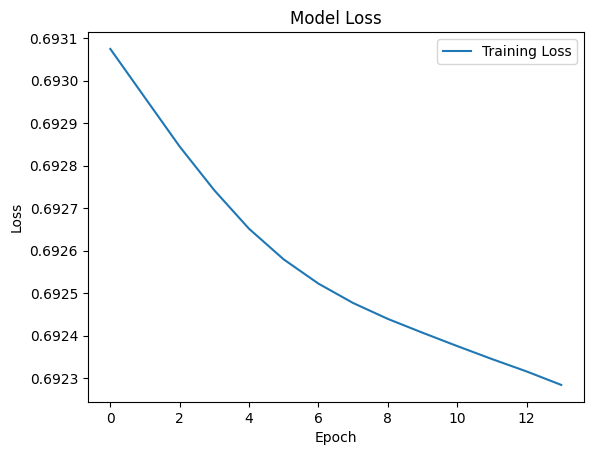

In [49]:
plt.plot(history.history['loss'][:], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [50]:
y_pred_train=my_model.predict(x_train_scaled)
my_model.summary()

578/578 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L0 (Dense)                      │ (None, 2096)           │        25,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 4048)           │     8,488,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L4 (Dense)                      │ (None, 1500)           │     6,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L4.5 (Dense)                    │ (None, 700)            │     1,050,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L5 (Dense)                      │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L6 (Dense)                      │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L7 (Dense)                      │ (None, 40)             │        10,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L8 (Dense)                      │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L9 (Dense)                      │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L10 (Dense)                     │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L11 (Dense)                     │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,374,633 (184.53 MB)

 Trainable params: 16,124,877 (61.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,249,756 (123.02 MB)

In [51]:
y_pred_train
nu_y_pred_train=(y_pred_train>=0.5).astype(int)


In [52]:
nu_y_pred_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [53]:
print(classification_report(y_train,nu_y_pred_train))
#TRAINING SET

              precision    recall  f1-score   support

           0       0.51      0.99      0.67      9314
           1       0.64      0.01      0.02      9171

    accuracy                           0.51     18485
   macro avg       0.57      0.50      0.35     18485
weighted avg       0.57      0.51      0.35     18485



In [54]:
y_pred_test=my_model.predict(x_test_scaled)
nu_y_pred_test=(y_pred_test>=0.5).astype(int)
print(classification_report(y_test,nu_y_pred_test))
# TESTING SET

146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step
              precision    recall  f1-score   support

           0       0.49      0.99      0.66      2297
           1       0.46      0.01      0.02      2355

    accuracy                           0.49      4652
   macro avg       0.47      0.50      0.34      4652
weighted avg       0.47      0.49      0.33      4652



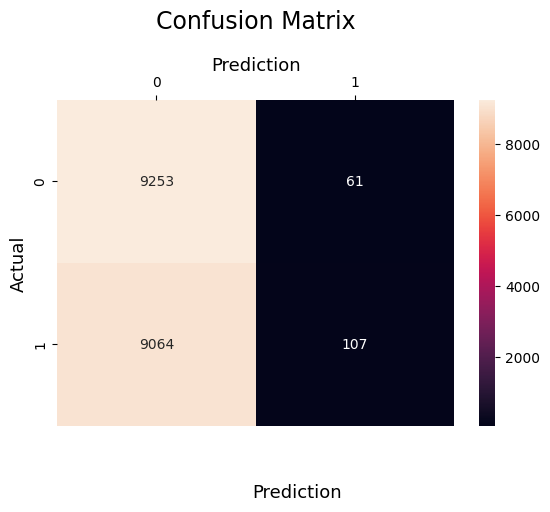

In [55]:
sns.heatmap(confusion_matrix(y_train,nu_y_pred_train), annot=True, fmt='g', xticklabels=['0','1'], yticklabels=['0','1']) 

plt.ylabel('Actual', fontsize=13) 
plt.title('Confusion Matrix', fontsize=17, pad=20) 
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13) 
plt.gca().xaxis.tick_top() 
plt.gca().figure.subplots_adjust(bottom=0.2) 
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13) 
plt.show()

In [56]:
# MY JOB HERE IS DONE

# Model Training and Evaluation using ARIMA 

Arima is designed for unvaried dataset therefore we are making use of one feature that we can use fro prediction

In [57]:
# we are making use of the 'CLOSE' feature for prediction
df_train_arima=df_train[['CLOSE']]
df_train_arima

,CLOSE
20,1.31637
21,1.31748
22,1.31846
23,1.31859
24,1.31888
...,...
18500,1.08827
18501,1.08665
18502,1.08580
18503,1.08652


In [58]:
df_test_arima=df_test[['CLOSE']]
df_test_arima

,CLOSE
0,1.08665
1,1.08514
2,1.08451
3,1.08594
4,1.08713
...,...
4647,1.12052
4648,1.12151
4649,1.12179
4650,1.12210


<Axes: >

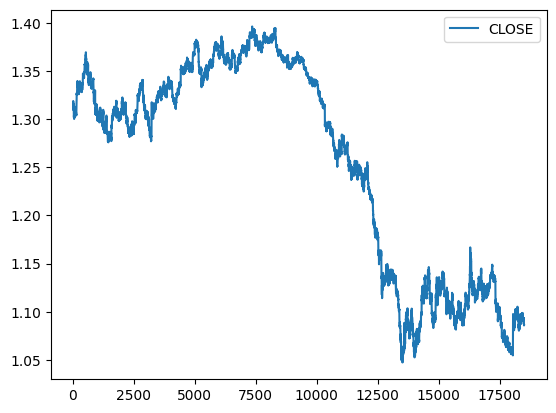

In [59]:
df_train_arima.plot()

<Axes: >

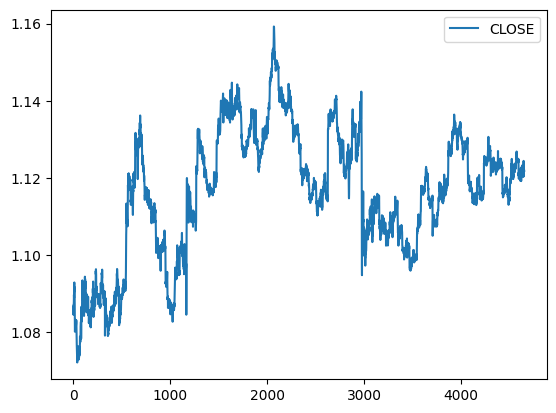

In [60]:
df_test_arima.plot()

In [61]:
# trying to make the dataset stationary since ARIMA works best with stationary dataset
# we are going via log transformation as against differencing

# In this, we can see that the variance doesn't look constant throughout time
# don't be decieve by the test plot because it operates on a much smaller scale relative to it training set. 
# so the variance speculation that i came up with still same for both datasets


# This transformation to log helps to stabilize the variance and make the time series more stationary
# it helps reduce variability, improve stationarity, and linearize exponential trends?

In [62]:
# so first lets transform this series to stabilize its variance
new_df_train_arima=np.log(df_train_arima)
new_df_test_arima=np.log(df_test_arima)

<Axes: >

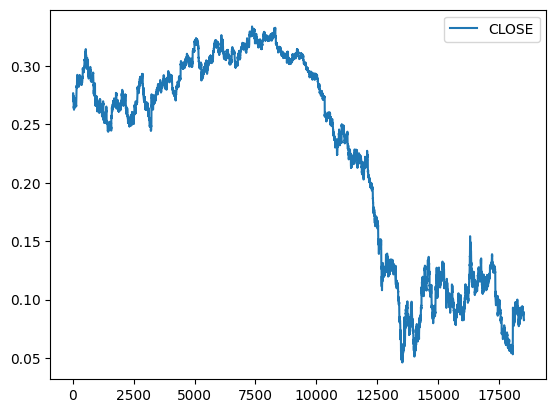

In [63]:
new_df_train_arima.plot()

## Step1: Check for Stationarity of the time series

In [64]:
# Method 1: time series plot.. which was done in the above

# Method 2: ACF plot and PACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

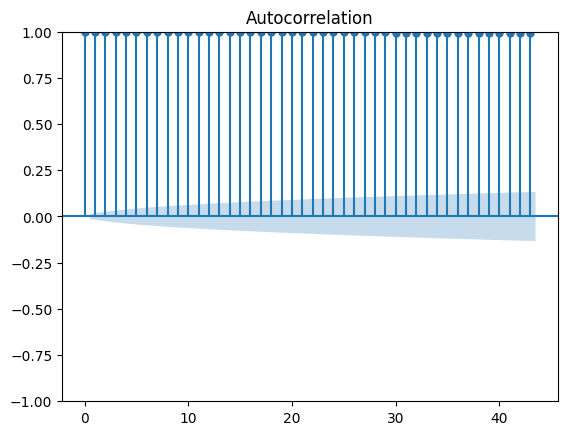

In [65]:
acf_train_plot=plot_acf(new_df_train_arima)

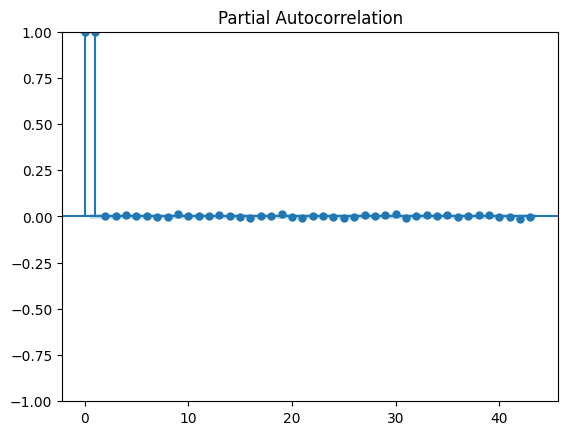

In [66]:
pacf_train_plot=plot_pacf(new_df_train_arima)

### Method #3: Augmented Dickey-Fuller (ADF) test

In [67]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(new_df_train_arima)
print(f'p-value: {adf_test[1]}')

p-value: 0.9303370048579966


In [68]:
# as we can see after implementing we discover that the p-value is less than 0.05 , hence rejecting the null hypothesis and suggesting the series is stationary.

# so therefore the dataset is not stationary hence you can't use it yet. You need to make  it stationary first. 
# We can employ this by using differencing (subtracting previous values) to remove trends and seasonality. 
# Once stationary, the data is suitable for ARIMA.

<Axes: >

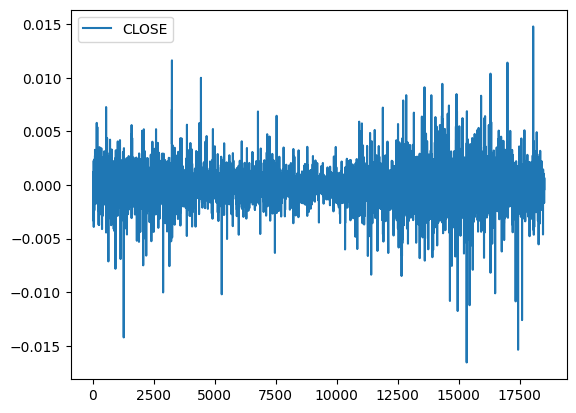

In [69]:
df_train_diff = new_df_train_arima.diff().dropna()
df_train_diff.plot()

In [70]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


p-value of 0 typically indicates strong statistical significance

## Step 2: Determine ARIMA models parameters p, q
## Step 3: Fit the ARIMA model


In [71]:
# if the PACF plot has a significant spike at lag p, but not beyond;
# the ACF plot decays more gradually. This may suggest an ARIMA (p,d,0) model. 
# if the ACF plot has a significant spike at lag q, but not beyond; 
#the PACF plot decays more gradually. This may suggest an ARIMA(0,d,q) model.

In [72]:
new_df_train_arima

,CLOSE
20,0.274878
21,0.275721
22,0.276464
23,0.276563
24,0.276783
...,...
18500,0.084589
18501,0.083100
18502,0.082317
18503,0.082980


In [73]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train_arima, order=(1,1,1))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [74]:
model_fit = model.fit()

In [75]:
print(model_fit.summary())
# note: ARIMA models are applied directly to the non-stationary dataset,
# and the differencing step is internally handled by the model.

                               SARIMAX Results                                
Dep. Variable:                  CLOSE   No. Observations:                18485
Model:                 ARIMA(1, 1, 1)   Log Likelihood               95433.069
Date:                Sat, 23 Nov 2024   AIC                        -190860.138
Time:                        00:19:49   BIC                        -190836.664
Sample:                             0   HQIC                       -190852.429
                              - 18485                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9433      0.042     22.602      0.000       0.861       1.025
ma.L1         -0.9483      0.040    -23.541      0.000      -1.027      -0.869
sigma2      1.918e-06   6.48e-09    296.226      0.0

# Step 4: Make time series predictions

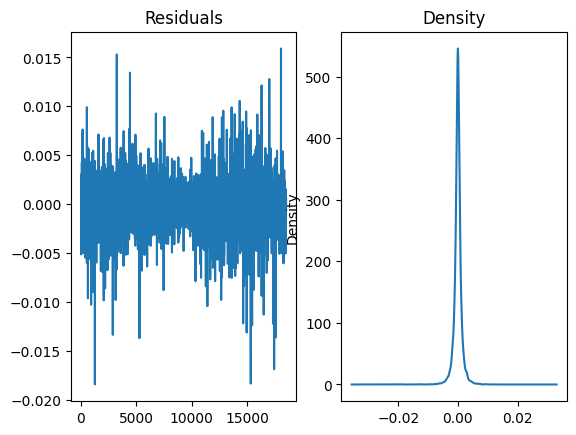

In [76]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

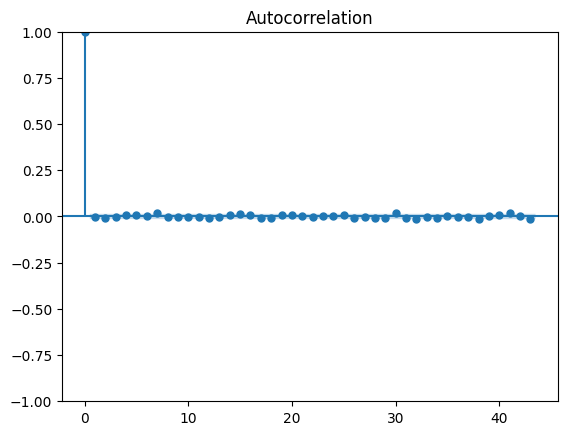

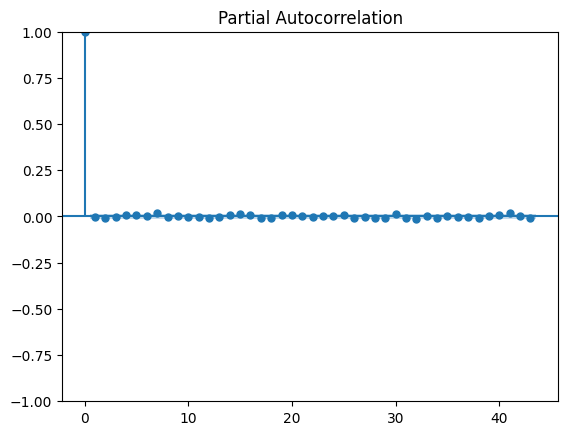

In [77]:
# looking at the acf and pacf plot of the residuals 
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

In [78]:
df_arima = pd.concat([df_train_arima, df_test_arima], axis=0,ignore_index=True)

In [79]:
forecast_test = model_fit.forecast(len(new_df_test_arima))

df_arima['forecast_manual'] = [None]*len(df_train_arima) + list(forecast_test)


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

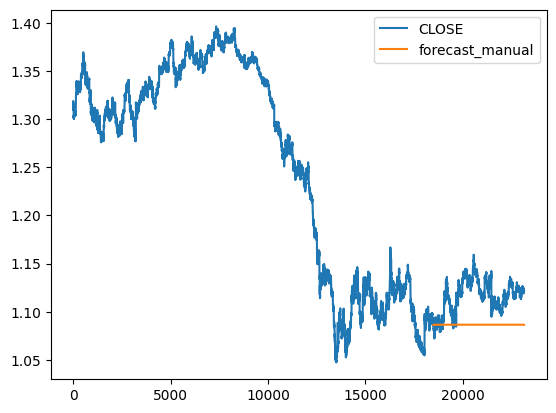

In [80]:
df_arima.plot()

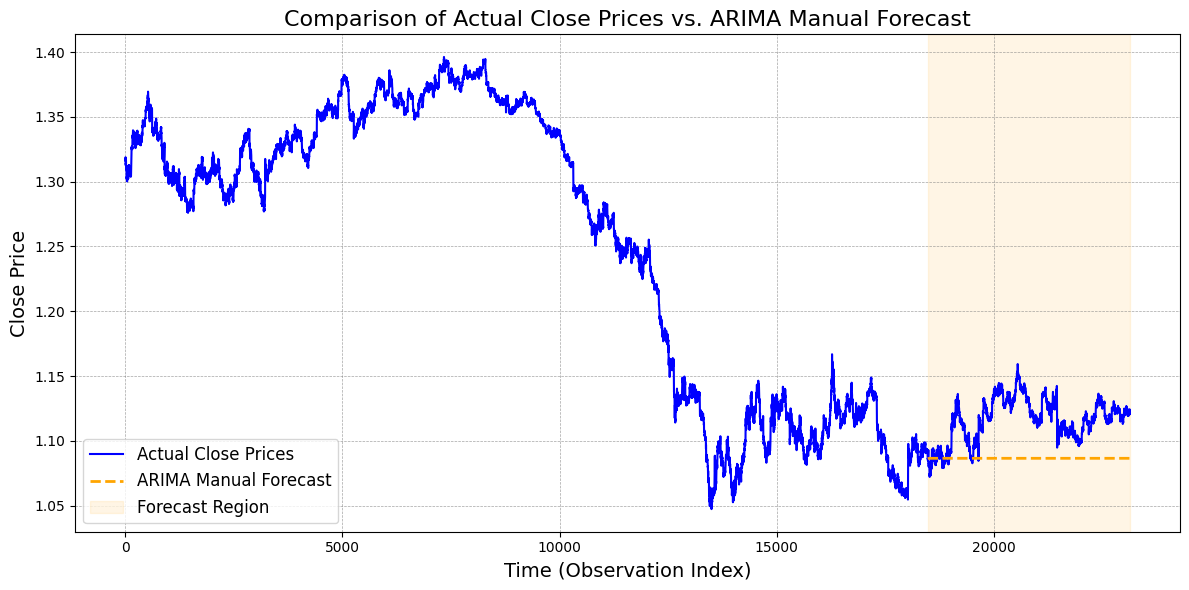

In [91]:
import matplotlib.pyplot as plt

# Assuming `df_arima` is a DataFrame with columns 'CLOSE' and 'forecast_manual'

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the actual close prices
plt.plot(df_arima.index, df_arima['CLOSE'], label="Actual Close Prices", color='blue', linewidth=1.5)

# Plot the forecasted values
plt.plot(df_arima.index, df_arima['forecast_manual'], label="ARIMA Manual Forecast", color='orange', linestyle='--', linewidth=2)

# Add title and labels
plt.title("Comparison of Actual Close Prices vs. ARIMA Manual Forecast", fontsize=16)
plt.xlabel("Time (Observation Index)", fontsize=14)
plt.ylabel("Close Price", fontsize=14)

# Add gridlines
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Highlight forecast area (optional, if forecast starts at a specific point)
forecast_start = df_arima['forecast_manual'].first_valid_index()
if forecast_start is not None:
    plt.axvspan(forecast_start, df_arima.index[-1], color='orange', alpha=0.1, label="Forecast Region")

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [81]:
# I am not satisfied with the output so let's opt in using Auto-fit

In [82]:
df_arima

,CLOSE,forecast_manual
0,1.31637,NaN
1,1.31748,NaN
2,1.31846,NaN
3,1.31859,NaN
4,1.31888,NaN
...,...,...
23132,1.12052,1.086526
23133,1.12151,1.086526
23134,1.12179,1.086526
23135,1.12210,1.086526


In [83]:
! pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:0000:010:01


In [84]:
# they are python packages that provides functions to fit ARIMA models automatically

import pmdarima as pm
auto_arima = pm.auto_arima(new_df_train_arima, stepwise=False, seasonal=False)
# the autooarima function helps us automate the steps to fit an arima model
# it would generate the optimal model based on its criteria
print(auto_arima)

 ARIMA(0,1,0)(0,0,0)[0] intercept


In [85]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                18485
Model:               SARIMAX(0, 1, 0)   Log Likelihood               98799.444
Date:                Sat, 23 Nov 2024   AIC                        -197594.888
Time:                        00:24:52   BIC                        -197579.239
Sample:                             0   HQIC                       -197589.748
                              - 18485                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -1.04e-05   8.52e-06     -1.221      0.222   -2.71e-05     6.3e-06
sigma2      1.333e-06    4.3e-09    310.091      0.000    1.32e-06    1.34e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):            277241.25
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Step 5: Evaluate model predictions

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

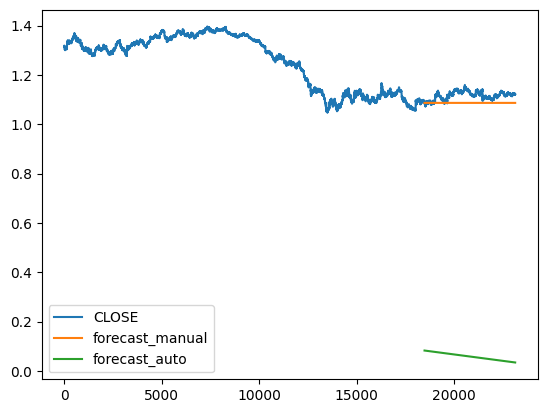

In [86]:
forecast_test_auto = auto_arima.predict(n_periods=len(new_df_test_arima))
df_arima['forecast_auto'] = [None]*len(new_df_train_arima) + list(forecast_test_auto)

df_arima.plot()

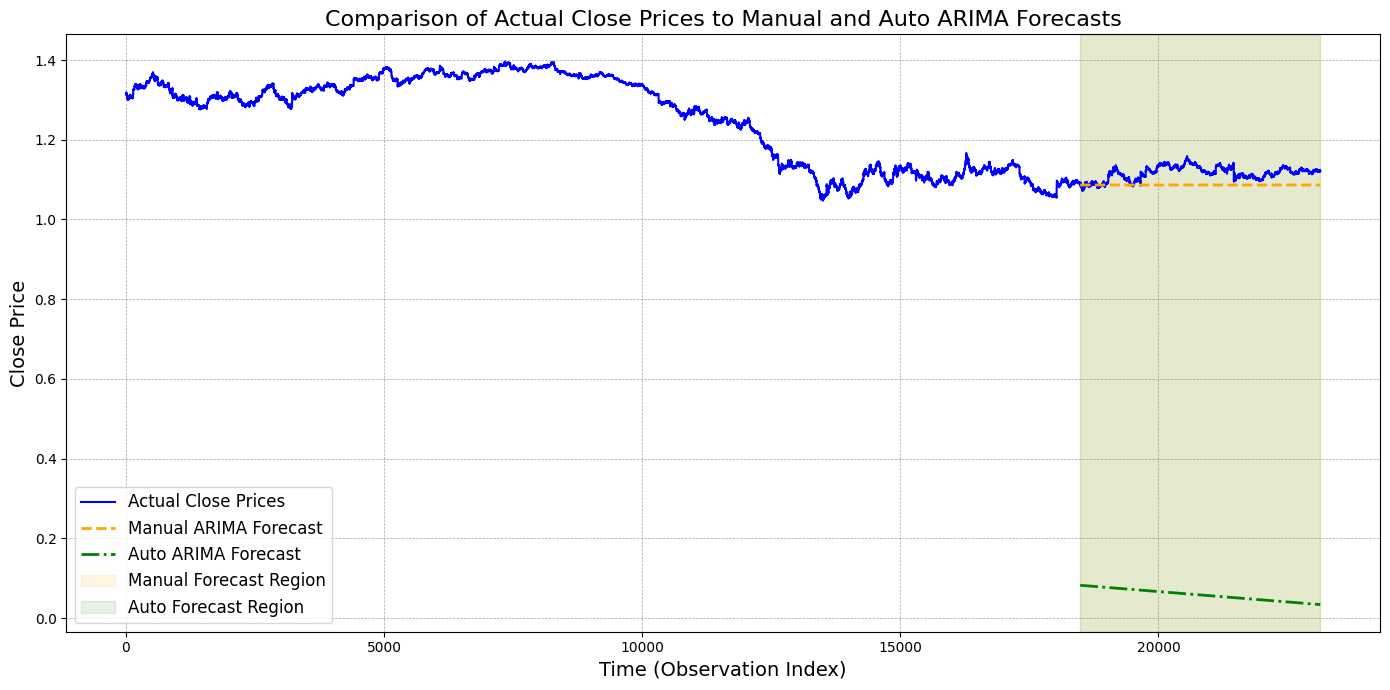

In [93]:
import matplotlib.pyplot as plt

# Assuming `df_arima` is a DataFrame with columns 'CLOSE', 'forecast_manual', and 'forecast_auto'

# Create the plot
plt.figure(figsize=(14, 7))

# Plot the actual close prices
plt.plot(df_arima.index, df_arima['CLOSE'], label="Actual Close Prices", color='blue', linewidth=1.5)

# Plot the manual forecast values
plt.plot(df_arima.index, df_arima['forecast_manual'], label="Manual ARIMA Forecast", color='orange', linestyle='--', linewidth=2)

# Plot the auto forecast values
plt.plot(df_arima.index, df_arima['forecast_auto'], label="Auto ARIMA Forecast", color='green', linestyle='-.', linewidth=2)

# Add title and axis labels
plt.title("Comparison of Actual Close Prices to Manual and Auto ARIMA Forecasts", fontsize=16)
plt.xlabel("Time (Observation Index)", fontsize=14)
plt.ylabel("Close Price", fontsize=14)

# Add gridlines
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Highlight forecast regions (optional, if forecast starts at a specific point)
manual_forecast_start = df_arima['forecast_manual'].first_valid_index()
auto_forecast_start = df_arima['forecast_auto'].first_valid_index()

if manual_forecast_start is not None:
    plt.axvspan(manual_forecast_start, df_arima.index[-1], color='orange', alpha=0.1, label="Manual Forecast Region")

if auto_forecast_start is not None:
    plt.axvspan(auto_forecast_start, df_arima.index[-1], color='green', alpha=0.1, label="Auto Forecast Region")

# Add legend
plt.legend(fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [87]:
# I am not convenient with the auto forecast because the prediction is way off and it selecting a model of ARIMA (0,1,0).
# which isn't quite accurate
# so it is best that we stick to the manual prediction that I did which is ARIMA(1,1,1) which captured quite well 


In [88]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(new_df_test_arima, forecast_test)
mape = mean_absolute_percentage_error(new_df_test_arima, forecast_test)
rmse = np.sqrt(mean_squared_error(new_df_test_arima, forecast_test))
mse = mean_squared_error(new_df_test_arima, forecast_test)

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')
print(f'mse - manual: {mse}')

mae - manual: 0.9766071194432628
mape - manual: 9.08438053870018
rmse - manual: 0.9767192928923991
mse - manual: 0.953980577108228


In [89]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(new_df_test_arima, forecast_test_auto)
mape = mean_absolute_percentage_error(new_df_test_arima, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(new_df_test_arima, forecast_test_auto))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.05176690894807165
mape - manual: 0.45276357636885595
rmse - manual: 0.05678237253500458


# Now comparing the metrics of the Artificial Neural Network, ARIMA model, and all other models that were trained outside of this notebook but were still used in the comparative analysis relative to the research conducted.

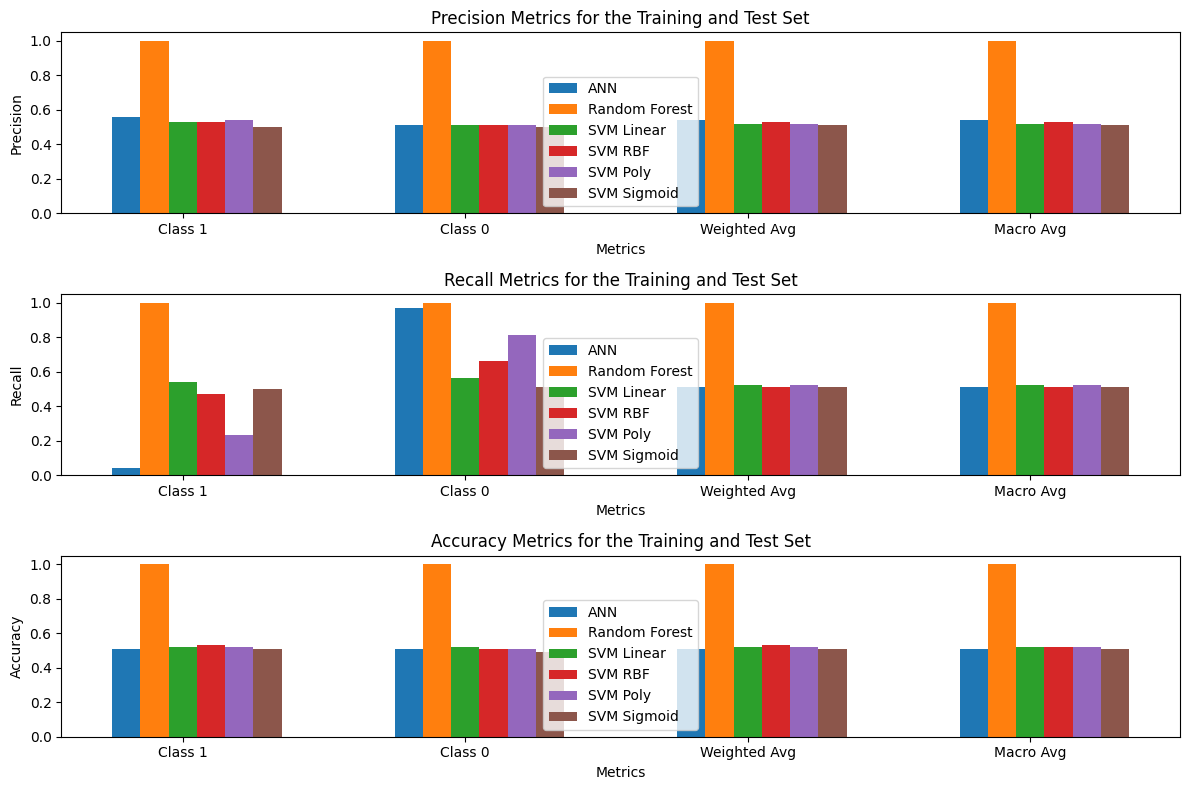

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
features = ['Class 1', 'Class 0', 'Weighted Avg', 'Macro Avg']
ANN = [0.56, 0.51, 0.54, 0.54]
Random_Forest = [1.00, 1.00, 1.00, 1.00]
SVM_Linear = [0.53, 0.51, 0.52, 0.52]
SVM_RBF = [0.53, 0.51, 0.53, 0.53]
SVM_Poly = [0.54, 0.51, 0.52, 0.52]
SVM_Sigmoid = [0.50, 0.50, 0.51, 0.51]

# Set positions for the bars
x = np.arange(len(features))  

# Plot Precision Metrics
plt.figure(figsize=(12, 8))

# Plot Precision
plt.subplot(3, 1, 1)
bar_width = 0.1
plt.bar(x - bar_width*2, ANN, bar_width, label='ANN')
plt.bar(x - bar_width, Random_Forest, bar_width, label='Random Forest')
plt.bar(x, SVM_Linear, bar_width, label='SVM Linear')
plt.bar(x + bar_width, SVM_RBF, bar_width, label='SVM RBF')
plt.bar(x + bar_width*2, SVM_Poly, bar_width, label='SVM Poly')
plt.bar(x + bar_width*3, SVM_Sigmoid, bar_width, label='SVM Sigmoid')

plt.xlabel('Metrics')
plt.ylabel('Precision')
plt.title('Precision Metrics for the Training and Test Set')
plt.xticks(x, features)
plt.legend()

# Plot Recall Metrics
plt.subplot(3, 1, 2)
plt.bar(x - bar_width*2, [0.04, 0.97, 0.51, 0.51], bar_width, label='ANN')
plt.bar(x - bar_width, [1.00, 1.00, 1.00, 1.00], bar_width, label='Random Forest')
plt.bar(x, [0.54, 0.56, 0.52, 0.52], bar_width, label='SVM Linear')
plt.bar(x + bar_width, [0.47, 0.66, 0.51, 0.51], bar_width, label='SVM RBF')
plt.bar(x + bar_width*2, [0.23, 0.81, 0.52, 0.52], bar_width, label='SVM Poly')
plt.bar(x + bar_width*3, [0.50, 0.51, 0.51, 0.51], bar_width, label='SVM Sigmoid')

plt.xlabel('Metrics')
plt.ylabel('Recall')
plt.title('Recall Metrics for the Training and Test Set')
plt.xticks(x, features)
plt.legend()

# Plot Accuracy Metrics
plt.subplot(3, 1, 3)
plt.bar(x - bar_width*2, [0.51, 0.51, 0.51, 0.51], bar_width, label='ANN')
plt.bar(x - bar_width, [1.00, 1.00, 1.00, 1.00], bar_width, label='Random Forest')
plt.bar(x, [0.52, 0.52, 0.52, 0.52], bar_width, label='SVM Linear')
plt.bar(x + bar_width, [0.53, 0.51, 0.53, 0.52], bar_width, label='SVM RBF')
plt.bar(x + bar_width*2, [0.52, 0.51, 0.52, 0.52], bar_width, label='SVM Poly')
plt.bar(x + bar_width*3, [0.51, 0.49, 0.51, 0.51], bar_width, label='SVM Sigmoid')

plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Accuracy Metrics for the Training and Test Set')
plt.xticks(x, features)
plt.legend()

plt.tight_layout()
plt.show()


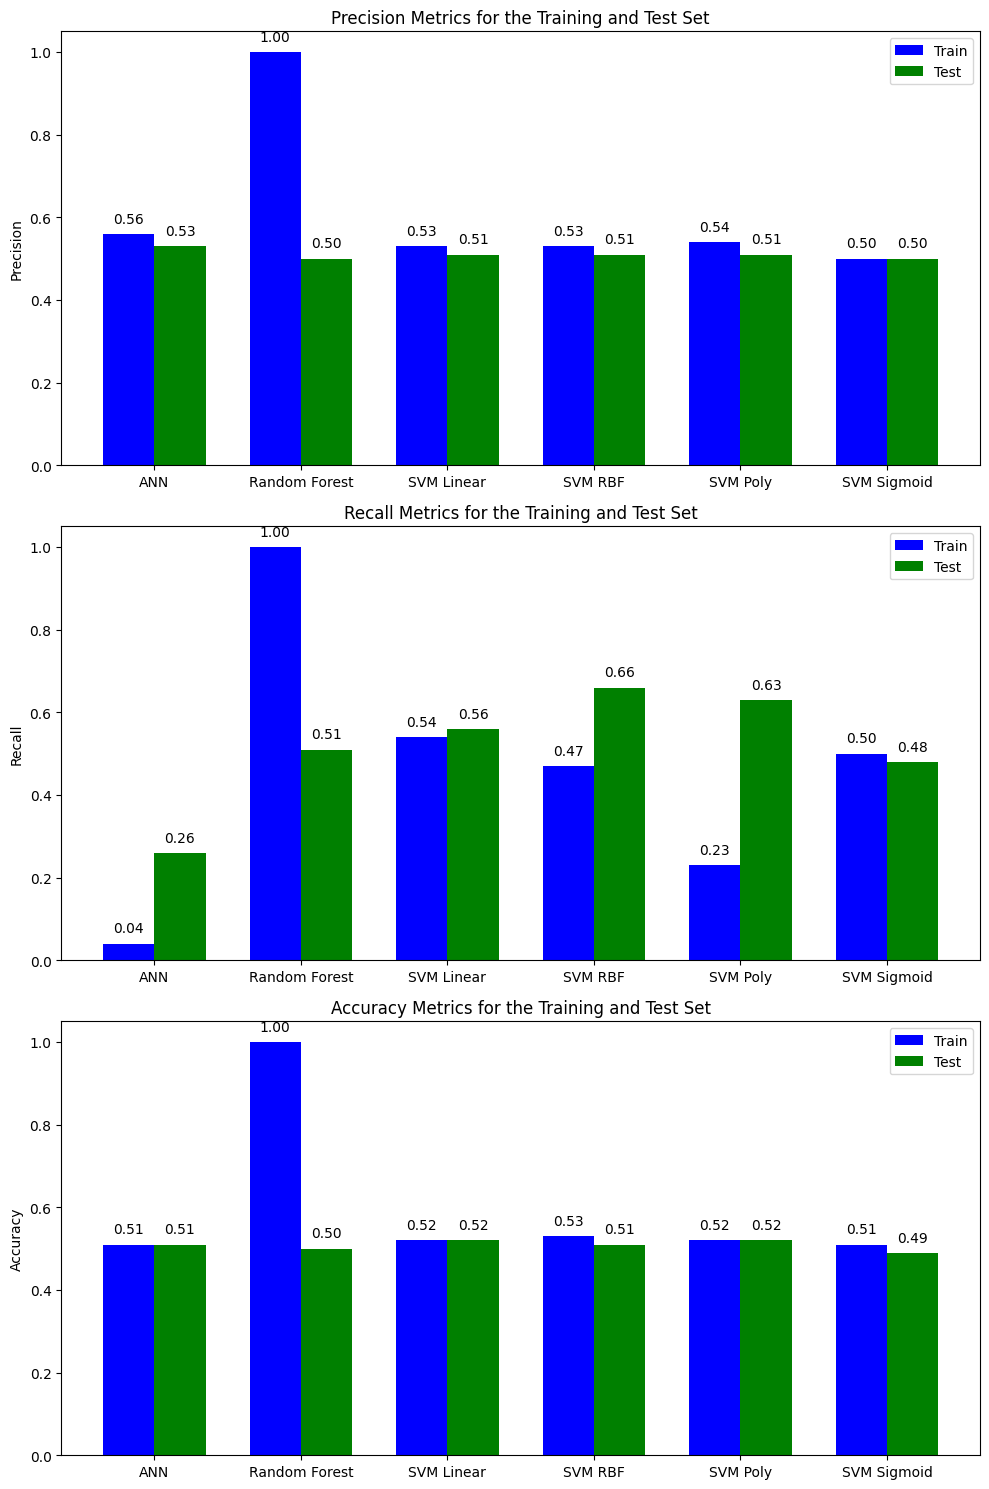

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plots
models = ['ANN', 'Random Forest', 'SVM Linear', 'SVM RBF', 'SVM Poly', 'SVM Sigmoid']
precision_train = [0.56, 1.00, 0.53, 0.53, 0.54, 0.50]
precision_test = [0.53, 0.50, 0.51, 0.51, 0.51, 0.50]
recall_train = [0.04, 1.00, 0.54, 0.47, 0.23, 0.50]
recall_test = [0.26, 0.51, 0.56, 0.66, 0.63, 0.48]
accuracy_train = [0.51, 1.00, 0.52, 0.53, 0.52, 0.51]
accuracy_test = [0.51, 0.50, 0.52, 0.51, 0.52, 0.49]

# Set the positions for the bars
x = np.arange(len(models))

# Width of the bars
width = 0.35

# Create the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot Precision
axes[0].bar(x - width / 2, precision_train, width, label='Train', color='b')
axes[0].bar(x + width / 2, precision_test, width, label='Test', color='g')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision Metrics for the Training and Test Set')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()

# Adding labels to bars
for i, v in enumerate(precision_train):
    axes[0].text(i - width / 2, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
for i, v in enumerate(precision_test):
    axes[0].text(i + width / 2, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

# Plot Recall
axes[1].bar(x - width / 2, recall_train, width, label='Train', color='b')
axes[1].bar(x + width / 2, recall_test, width, label='Test', color='g')
axes[1].set_ylabel('Recall')
axes[1].set_title('Recall Metrics for the Training and Test Set')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()

# Adding labels to bars
for i, v in enumerate(recall_train):
    axes[1].text(i - width / 2, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
for i, v in enumerate(recall_test):
    axes[1].text(i + width / 2, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

# Plot Accuracy
axes[2].bar(x - width / 2, accuracy_train, width, label='Train', color='b')
axes[2].bar(x + width / 2, accuracy_test, width, label='Test', color='g')
axes[2].set_ylabel('Accuracy')
axes[2].set_title('Accuracy Metrics for the Training and Test Set')
axes[2].set_xticks(x)
axes[2].set_xticklabels(models)
axes[2].legend()

# Adding labels to bars
for i, v in enumerate(accuracy_train):
    axes[2].text(i - width / 2, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
for i, v in enumerate(accuracy_test):
    axes[2].text(i + width / 2, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

# Display the plots
plt.tight_layout()
plt.show()
